# Assignment 3 

MACS 30000, Dr. Evans

Di Tong

1. Simulation in Sociology, Moretti (2002)

 See the attached PDF 

2. Simulating your income

(a)I will use the following codes to Simulate 10,000 different realizations of lifetime income.

In [13]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [14]:
# Function to do the simulations
def normal_income_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'inc0'          : 80000,      #average initial income
        'g'             : 0.025,      #growth rate
        'dep'           : 0.4,        #positive dependence of today's income on 
                                      last period's income
        'work_years'    : 40,         #working years
        'st_year'       : 2020,       #start year
        'mean'          : 0,          #mean of normal distribution 
        'sd'            : 0.13,       #standard deviation of normal distribution
        'size'          : 40,         #size of normal distribution
        'num_draws'     : 10000       #simulations
    }
    """    

    #set random seed
    np.random.seed(524)

    #create a set of 40 normally distributed errors
    normal_errors = np.random.normal(p['mean'], p['sd'], (p['size'], p['num_draws']))

    #create a matrix of income (work_years, num_draws)
    ln_inc_mat = np.zeros((p['work_years'], p['num_draws']))

    #fill the matrix
    ln_inc_mat[0, :] = np.log(p['inc0']) + normal_errors[0, :]

    #loop and apply model
    for yr in range(1, p['work_years']):
        ln_inc_mat[yr, :] = ((1 - p['dep']) * (np.log(p['inc0']) + p['g'] * yr) +
                                p['dep'] * ln_inc_mat[yr - 1, :]  +
                                normal_errors[yr, :])

    
    inc_mat = np.exp(ln_inc_mat) #dealing with large numbers so put in terms of 10k's                       
    return inc_mat

In [15]:
# Define the simulation profile and plug it in the function
simulation_profile = {
    'inc0'          : 80000,      #average initial income
    'g'             : 0.025,      #growth rate
    'dep'           : 0.4,        #positive dependence of today's income on 
                                  #last period's income
    'work_years'    : 40,         #working years
    'st_year'       : 2020,       #start year
    'mean'          : 0,          #mean of normal distribution 
    'sd'            : 0.13,       #standard deviation of normal distribution
    'size'          : 40,         #size of normaldistribution
    'num_draws'     : 10000       #simulations
}

inc_mat = normal_income_sim(simulation_profile)

I will use the following codes to plot one of the lifetime income paths.

Text(0,0.5,'Annual income (\\$s)')

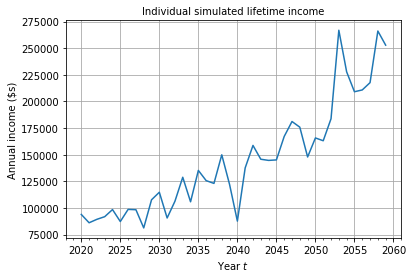

In [16]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['work_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

(b) Plot a histogram with 50 bins of year t = 2020 initial income for each of the 10,000 simulations.

Text(0.5,1,'Simulated Income of 2020 for MACSS-18 Students')

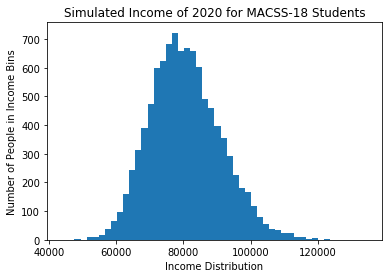

In [17]:
plt.hist(inc_mat[0,:], bins=50)
plt.xlabel("Income Distribution")
plt.ylabel("Number of People in Income Bins")
plt.title("Simulated Income of 2020 for MACSS-18 Students")

In [18]:
#calculate the percentage of people in my class that will earn more 
#than $100,000 in the first year out of the program
num = 0
for d in inc_mat[0]:
    if d > 100000:
        num +=1
percentage = num / 10000
print("percentage of people that earn more than $100000 =", percentage)

#calculate the percentage of people in my class that will earn less 
#than $70,000 in the first year out of the program
num = 0
for d in inc_mat[0]:
    if d < 70000:
        num +=1
percentage = num / 10000
print("percentage of people that earn less than $70000 =", percentage)

percentage of people that earn more than $100000 = 0.0417
percentage of people that earn less than $70000 = 0.1512


From the histogrm above, we can see that the distribution largely follows a normal distribution pattern, though it is a bit right skewed.

(c) I will use the following codes to calculate the years needed to pay off the loan for all simulations, plot the histogram and calculate the percentage.

In [19]:
# create a list of years needed to pay off debt for all simulations
inc_mat = normal_income_sim(simulation_profile)
def calculate_year(inc_mat):
    """
    Calculate the years needed to pay off debt

    """   
    years = []
    for column in inc_mat.T:
        paid_debt = 0
        for i in range(len(column)):
            if paid_debt < 95000:
                paid_debt += 0.1 * column[i]
            else:
                years.append(i)
                break
    return years

# remove the duplicate elements in the list years and calculate 
#unique years in which people pay off the debt
years = calculate_year(inc_mat)

def remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
non_duplicate_years = remove(years)
n = len(non_duplicate_years) 

Text(0.5,1,'Years Taken to Pay off Loan for MACSS-18 Students')

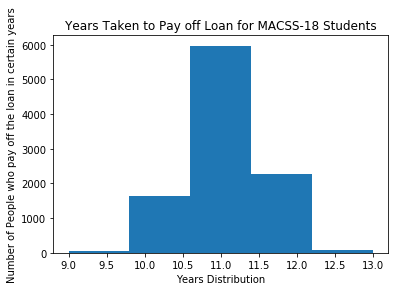

In [20]:
plt.hist(years[:], bins = n)
plt.xlabel("Years Distribution")
plt.ylabel("Number of People who pay off the loan in certain years")
plt.title("Years Taken to Pay off Loan for MACSS-18 Students")

In [21]:
# Calculate the percentage of the simulations that I am able to 
#pay off the debt in ten years
count = 0
for t in years:
    if t <= 10:
        count +=1
percentage = count / 10000
print("percentage of the simulations that I am able to \
pay off the debt in ten years =", percentage)

percentage of the simulations that I am able to pay off the debt in ten years = 0.1678


(d) I will use the following codes to calculate the years needed to pay off the loan for all simulations, plot the histogram and calculate the percentage.

In [22]:
new_simulation_profile = {
    'inc0'          : 90000,      #average initial income
    'g'             : 0.025,      #growth rate
    'dep'           : 0.4,        #positive dependence of today's income 
                                  #on last period's income
    'work_years'    : 40,         #working years
    'st_year'       : 2020,       #start year
    'mean'          : 0,          #mean of normal distribution 
    'sd'            : 0.17,       #standard deviation of normal distribution
    'size'          : 40,         #size of normaldistribution
    'num_draws'     : 10000       #simulations
}

inc_mat = normal_income_sim(new_simulation_profile)
new_years = calculate_year(inc_mat)
new_n_dup_years = remove(new_years)
p = len(new_n_dup_years) 

Text(0.5,1,'Years Taken to Pay off Loan for MACSS-18 Students')

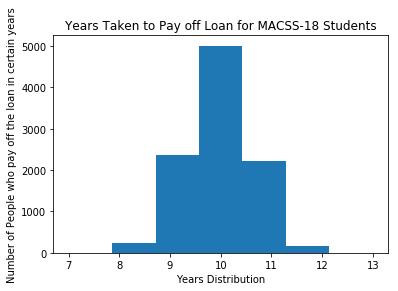

In [23]:
plt.hist(new_years[:], bins = p)
plt.xlabel("Years Distribution")
plt.ylabel("Number of People who pay off the loan in certain years")
plt.title("Years Taken to Pay off Loan for MACSS-18 Students")

In [24]:
#Calculate the percentage of the simulations that I am able to 
#pay off the debt in ten years
new_count = 0
for t in new_years:
    if t <= 10:
        new_count +=1
new_percentage = new_count / 10000
print("percentage of the simulations that I am able to \
pay off the debt in ten year =", new_percentage)

percentage of the simulations that I am able to pay off the debt in ten year = 0.7602
